In [34]:
import pandas as pd 
import numpy as np 
import math
from datetime import datetime as dt

In [26]:
data = pd.read_csv('./posts_df.csv')
data.head(5)

,time,tags,nsfw,my,images,videos,text_len,rating
0,1569877228,"Творчество детское, Рисунок, Детский сад, Детс...",0,1,2,0,135,683
1,1569877232,"Собака, Было-Стало, {#73#}",0,1,1,0,113,480
2,1569877241,"Дерево, Поле, Фотография",0,0,1,0,0,301
3,1569877249,"Военторг, Из сети, Продукты, Длиннопост",0,0,4,0,0,425
4,1569877259,"Mortal Kombat 11, Тизер, Текст, Геймеры, Новос...",0,0,1,0,726,617


In [27]:
# time = 1569877228

In [28]:
# dt.utcfromtimestamp(1569877228).strftime('%Y-%m-%d %H:%M:%S')

In [29]:
# data.time = data.time.apply(lambda x: dt.utcfromtimestamp(x).strftime('%Y-%m-%d %H:%M:%S'))

In [30]:
# data.head

In [35]:
data['time'] = data['time'] % (60*60*24)
data.time = (data.time / data.time.max()) * 2*math.pi
data.head(5)

,time,tags,nsfw,my,images,videos,text_len,rating
0,5.499887,"Творчество детское, Рисунок, Детский сад, Детс...",0,1,2,0,135,683
1,5.500178,"Собака, Было-Стало, {#73#}",0,1,1,0,113,480
2,5.500832,"Дерево, Поле, Фотография",0,0,1,0,0,301
3,5.501414,"Военторг, Из сети, Продукты, Длиннопост",0,0,4,0,0,425
4,5.502141,"Mortal Kombat 11, Тизер, Текст, Геймеры, Новос...",0,0,1,0,726,617


In [36]:
tsin_list = []
tcos_list = []
for row in data.time: 
    tsin_list.append(math.sin(row))
    tcos_list.append(math.cos(row))
    
data['tsin'] = tsin_list
data['tcos'] = tcos_list

data.head(5)

,time,tags,nsfw,my,images,videos,text_len,rating,tsin,tcos
0,5.499887,"Творчество детское, Рисунок, Детский сад, Детс...",0,1,2,0,135,683,-0.705620,0.708590
1,5.500178,"Собака, Было-Стало, {#73#}",0,1,1,0,113,480,-0.705414,0.708795
2,5.500832,"Дерево, Поле, Фотография",0,0,1,0,0,301,-0.704950,0.709257
3,5.501414,"Военторг, Из сети, Продукты, Длиннопост",0,0,4,0,0,425,-0.704537,0.709667
4,5.502141,"Mortal Kombat 11, Тизер, Текст, Геймеры, Новос...",0,0,1,0,726,617,-0.704021,0.710179


In [37]:
data = data.drop(columns=['time'], axis=1)
data.head(5)

,tags,nsfw,my,images,videos,text_len,rating,tsin,tcos
0,"Творчество детское, Рисунок, Детский сад, Детс...",0,1,2,0,135,683,-0.705620,0.708590
1,"Собака, Было-Стало, {#73#}",0,1,1,0,113,480,-0.705414,0.708795
2,"Дерево, Поле, Фотография",0,0,1,0,0,301,-0.704950,0.709257
3,"Военторг, Из сети, Продукты, Длиннопост",0,0,4,0,0,425,-0.704537,0.709667
4,"Mortal Kombat 11, Тизер, Текст, Геймеры, Новос...",0,0,1,0,726,617,-0.704021,0.710179


In [40]:
data.tags = data.tags.apply(lambda x: x.split(', '))

AttributeError: 'list' object has no attribute 'split'

In [41]:
data.head()

,tags,nsfw,my,images,videos,text_len,rating,tsin,tcos
0,"[Творчество детское, Рисунок, Детский сад, Дет...",0,1,2,0,135,683,-0.705620,0.708590
1,"[Собака, Было-Стало, {#73#}]",0,1,1,0,113,480,-0.705414,0.708795
2,"[Дерево, Поле, Фотография]",0,0,1,0,0,301,-0.704950,0.709257
3,"[Военторг, Из сети, Продукты, Длиннопост]",0,0,4,0,0,425,-0.704537,0.709667
4,"[Mortal Kombat 11, Тизер, Текст, Геймеры, Ново...",0,0,1,0,726,617,-0.704021,0.710179


In [43]:
in_comm_list = []

for row in data.tags:
    is_in_comm = 0
    for tag in row:
        if tag[0] == '{' and tag[-1] == '}':
            row.remove(tag)
            is_in_comm = 1
    in_comm_list.append(is_in_comm)
    
data['in_comm'] = in_comm_list

In [44]:
data.head()

,tags,nsfw,my,images,videos,text_len,rating,tsin,tcos,in_comm
0,"[Творчество детское, Рисунок, Детский сад, Дет...",0,1,2,0,135,683,-0.705620,0.708590,0
1,"[Собака, Было-Стало]",0,1,1,0,113,480,-0.705414,0.708795,1
2,"[Дерево, Поле, Фотография]",0,0,1,0,0,301,-0.704950,0.709257,0
3,"[Военторг, Из сети, Продукты, Длиннопост]",0,0,4,0,0,425,-0.704537,0.709667,0
4,"[Mortal Kombat 11, Тизер, Текст, Геймеры, Ново...",0,0,1,0,726,617,-0.704021,0.710179,0


In [45]:
tags_set = set()

for row in data['tags']:
    for tag in row:
        tags_set.add(tag)

print(len(tags_set))

63385


In [47]:
# tags_set

In [52]:
tags_dict = {tag: 0 for tag in tags_set}
# tags_dict

for row in data.tags:
    for tag in row:
        tags_dict[tag] += 1

# print(tags_dict)

In [54]:
tags_list = list(tags_dict.items())
# tags_list
tags_list.sort(key=lambda x: x[1], reverse=True)

In [55]:
tags_list[:10]

[('Длиннопост', 75128),
 ('Текст', 59256),
 ('Видео', 34107),
 ('Юмор', 14957),
 ('Кот', 13512),
 ('Фотография', 10869),
 ('Мат', 8662),
 ('Скриншот', 8251),
 ('Арт', 7585),
 ('Комиксы', 6446)]

In [56]:
tags_list[-10:]

[('Нарядное платье', 1),
 ('Серая', 1),
 ('Котлас', 1),
 ('Summoners War', 1),
 ('Пилим бюджет весело', 1),
 ('Инвестиционный портфель', 1),
 ('Помни предков своих', 1),
 ('Gooze Art', 1),
 ('День Конституции', 1),
 ('Снимок телефона', 1)]

In [59]:
tags2use = 50
popular_tags = [t[0] for t in tags_list[:tags2use]]
print(len(popular_tags))

50


In [60]:
for tag in popular_tags:
    data[tag] = data.tags.apply(lambda x: int(tag in x))
    
data.head(5)

,tags,nsfw,my,images,videos,text_len,rating,tsin,tcos,in_comm,...,Милота,Своими руками,My Little Pony,Музыка,Мошенничество,Отношения,Стихи,Зима,СССР,Еда
0,"[Творчество детское, Рисунок, Детский сад, Дет...",0,1,2,0,135,683,-0.705620,0.708590,0,...,0,0,0,0,0,0,0,0,0,0
1,"[Собака, Было-Стало]",0,1,1,0,113,480,-0.705414,0.708795,1,...,0,0,0,0,0,0,0,0,0,0
2,"[Дерево, Поле, Фотография]",0,0,1,0,0,301,-0.704950,0.709257,0,...,0,0,0,0,0,0,0,0,0,0
3,"[Военторг, Из сети, Продукты, Длиннопост]",0,0,4,0,0,425,-0.704537,0.709667,0,...,0,0,0,0,0,0,0,0,0,0
4,"[Mortal Kombat 11, Тизер, Текст, Геймеры, Ново...",0,0,1,0,726,617,-0.704021,0.710179,0,...,0,0,0,0,0,0,0,0,0,0


In [67]:
data['other'] = data[popular_tags].sum(axis=1)
# data.head(5)

data['other'] = data['other'].apply(lambda x: int(x == 0))
data.tail(5)

,tags,nsfw,my,images,videos,text_len,rating,tsin,tcos,in_comm,...,Своими руками,My Little Pony,Музыка,Мошенничество,Отношения,Стихи,Зима,СССР,Еда,other
262572,"[Аквариумистика, Аквариумные рыбки, Аквариум, ...",0,1,5,0,387,1128,-0.778409,-0.627757,1,...,0,0,0,0,0,0,0,0,0,0
262573,"[Противогаз, Своими руками, Видео]",0,0,0,1,0,312,-0.779595,-0.626284,0,...,1,0,0,0,0,0,0,0,0,0
262574,"[КБ, Энергетики, Запрет, Текст]",0,0,0,0,315,523,-0.782818,-0.622250,0,...,0,0,0,0,0,0,0,0,0,0
262575,"[Китай, Коронавирус, CS:GO]",0,1,1,0,52,436,-0.784670,-0.619914,1,...,0,0,0,0,0,0,0,0,0,1
262576,"[Питание, Белок, Диета, Метаболизм, Лайл макдо...",0,0,0,0,2426,703,-0.787323,-0.616541,0,...,0,0,0,0,0,0,0,0,0,0


In [72]:
data[popular_tags + ['other']].mean()

Длиннопост                   0.286118
Текст                        0.225671
Видео                        0.129893
Юмор                         0.056962
Кот                          0.051459
Фотография                   0.041394
Мат                          0.032272
Скриншот                     0.031423
Арт                          0.028887
Комиксы                      0.024549
Аниме                        0.022454
История                      0.020272
Anime Art                    0.020268
Собака                       0.019362
Без рейтинга                 0.019122
Комментарии на Пикабу        0.018303
Политика                     0.017599
Новый Год                    0.017515
Дети                         0.017092
Рисунок                      0.016806
Картинка с текстом           0.016209
Новости                      0.016163
Девушки                      0.015782
Помощь                       0.015100
Россия                       0.014929
Котомафия                    0.014918
Работа      

In [73]:
data = data.drop(columns = ['tags'], axis=1)
data.head(5)

,nsfw,my,images,videos,text_len,rating,tsin,tcos,in_comm,Длиннопост,...,Своими руками,My Little Pony,Музыка,Мошенничество,Отношения,Стихи,Зима,СССР,Еда,other
0,0,1,2,0,135,683,-0.705620,0.708590,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,113,480,-0.705414,0.708795,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,301,-0.704950,0.709257,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,4,0,0,425,-0.704537,0.709667,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,726,617,-0.704021,0.710179,0,0,...,0,0,0,0,0,0,0,0,0,0


In [75]:
X = data.drop(columns = ['rating']).to_numpy()
# X
Y = data['rating'].to_numpy()

In [77]:
X.shape

(262577, 59)

In [78]:
Y.shape

(262577,)

In [79]:
import tensorflow as tf

In [81]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, input_shape =(X.shape[1],), activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(10, activation='relu',name='l2'),
    tf.keras.layers.Dense(1, activation='linear', name='out')

])

In [82]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                600       
                                                                 
 l2 (Dense)                  (None, 10)                110       
                                                                 
 out (Dense)                 (None, 1)                 11        
                                                                 
Total params: 721
Trainable params: 721
Non-trainable params: 0
_________________________________________________________________


In [84]:
model.layers[-1].get_weights()

[array([[ 0.34612173],
        [ 0.25464725],
        [ 0.5792685 ],
        [ 0.11310393],
        [ 0.47423464],
        [ 0.5362975 ],
        [ 0.6880844 ],
        [-0.62883925],
        [ 0.6089849 ],
        [ 0.46602863]], dtype=float32),
 array([0.], dtype=float32)]

In [85]:
model.layers[-2].get_weights()

[array([[ 0.44247216, -0.40942755,  0.4083557 , -0.08632666,  0.1138044 ,
         -0.23498365,  0.4332809 ,  0.37403345, -0.45332223, -0.48986956],
        [-0.1895757 ,  0.1528495 ,  0.4243474 , -0.04223323,  0.5454538 ,
         -0.08373567, -0.05780953,  0.2918988 , -0.4009027 , -0.42448792],
        [ 0.46348703,  0.49076355,  0.26019728,  0.37817806,  0.5348333 ,
          0.15742528,  0.20116651, -0.28757516,  0.47715592, -0.5222881 ],
        [ 0.41394222, -0.5266129 ,  0.51362705,  0.39451098,  0.24846876,
          0.48520052,  0.38165283,  0.269606  ,  0.04421008,  0.22985911],
        [-0.47899464, -0.5442249 , -0.02704555,  0.02599066,  0.5475205 ,
         -0.44247735, -0.05847552, -0.06751975, -0.16495988,  0.16595691],
        [ 0.3483066 ,  0.18014377,  0.43798387,  0.32178628,  0.5406233 ,
         -0.41049278, -0.28927305, -0.5410808 , -0.27060968,  0.41798353],
        [ 0.38853163, -0.13544169,  0.01828903,  0.4316253 , -0.25134504,
         -0.30987385, -0.0560632

In [86]:
model.pop()
model.pop()

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                600       
                                                                 
Total params: 600
Trainable params: 600
Non-trainable params: 0
_________________________________________________________________


In [89]:
model.add(tf.keras.layers.Dense(1000, activation='relu', name='very_big'))
model.add(tf.keras.layers.Dense(1, activation='linear', name='out'))
          
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                600       
                                                                 
 very_big (Dense)            (None, 1000)              11000     
                                                                 
 out (Dense)                 (None, 1)                 1001      
                                                                 
Total params: 12,601
Trainable params: 12,601
Non-trainable params: 0
_________________________________________________________________


In [93]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(60, activation='relu', input_shape=(X.shape[1],)),
    tf.keras.layers.Dense(100, activation='relu', name = 'second'),
    tf.keras.layers.Dense(10, activation='relu', name= 'third'),
    tf.keras.layers.Dense(1, activation='linear', name = 'out')
])

In [94]:
model.load_weights('./weights.h5')

In [96]:
model.layers[-1].get_weights()

[array([[-0.49175557],
        [-0.26270723],
        [ 0.5572973 ],
        [ 1.0313578 ],
        [-1.2322445 ],
        [ 0.17110786],
        [ 0.77133995],
        [-2.3742123 ],
        [ 1.0334668 ],
        [-0.4283009 ]], dtype=float32),
 array([4.3187566], dtype=float32)]

In [100]:
Y_pred = model.predict(X)

8206/8206 [==============================] - 3s 353us/step


In [101]:
Y_pred

array([[533.6504 ],
       [479.2525 ],
       [278.7952 ],
       ...,
       [486.67563],
       [470.54605],
       [582.65735]], dtype=float32)

In [104]:
Y

array([683, 480, 301, ..., 523, 436, 703])

In [102]:
for i in range(10): 
    print(Y_pred[i], '\t', Y[i])

[533.6504] 	 683
[479.2525] 	 480
[278.7952] 	 301
[398.70383] 	 425
[522.42804] 	 617
[557.4728] 	 515
[205.00832] 	 219
[514.7047] 	 -11
[621.1805] 	 628
[292.87448] 	 349


In [105]:
import seaborn as sns

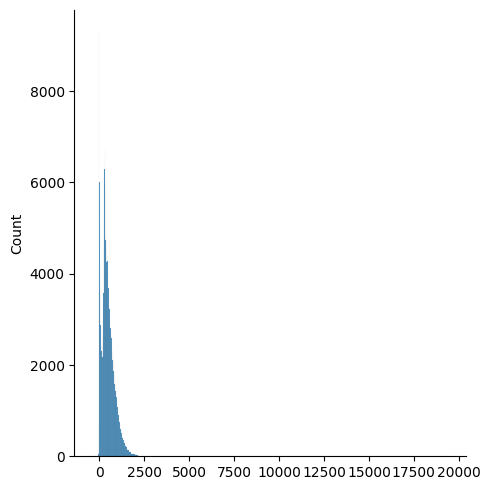

In [106]:
sns.displot(Y)

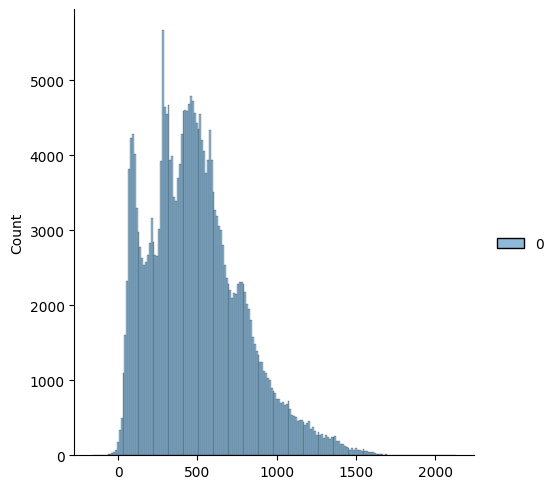

In [107]:
sns.displot(Y_pred)

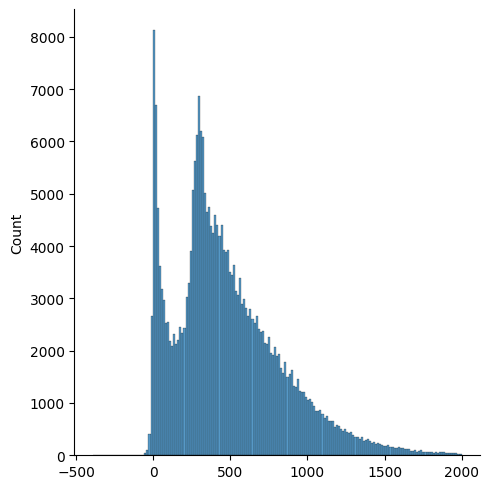

In [108]:
sns.displot([y for y in Y if y < 2000])

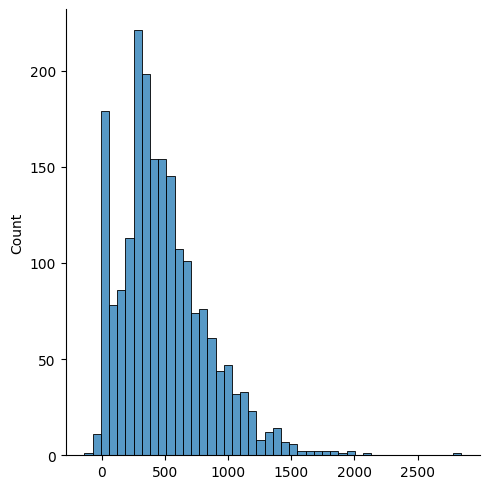

In [109]:
sns.displot(Y[:2000])

In [110]:
from sklearn.metrics import mean_absolute_error

In [111]:
mean_absolute_error(Y, Y_pred)

140.20016712753355

In [112]:
Y_pred_mean = np.repeat(Y.mean(), len(Y))

mean_absolute_error(Y, Y_pred_mean)

287.9861978214588

In [113]:
Y.mean()

492.68788203079475

In [115]:
import random

In [130]:
randomlist = []
for i in range(0,20):
    n = random.randint(1,10)
    randomlist.append(n)
print(randomlist)
arr = np.array(randomlist)
arr.shape

[8, 10, 8, 10, 7, 2, 5, 7, 2, 6, 2, 4, 7, 5, 10, 5, 6, 4, 9, 7]


(20,)

In [181]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(50, activation='relu', input_shape=arr.shape),
    tf.keras.layers.Dense(120, activation='relu', use_bias=False, name='second'),
    tf.keras.layers.Dense(3, activation='relu', name='out'),
    
])

model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 50)                1050      
                                                                 
 second (Dense)              (None, 120)               6000      
                                                                 
 out (Dense)                 (None, 3)                 363       
                                                                 
Total params: 7,413
Trainable params: 7,413
Non-trainable params: 0
_________________________________________________________________


In [189]:
matr = np.repeat(1, 59)[np.newaxis]
int(matr.shape[1])

59

In [193]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(60, activation='relu', input_shape=(matr.shape[1],)),
    tf.keras.layers.Dense(100, activation='relu', name='second'),
    tf.keras.layers.Dense(10, activation='relu', name='third'),
    tf.keras.layers.Dense(1, activation='linear', name='out'),
])

model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 60)                3600      
                                                                 
 second (Dense)              (None, 100)               6100      
                                                                 
 third (Dense)               (None, 10)                1010      
                                                                 
 out (Dense)                 (None, 1)                 11        
                                                                 
Total params: 10,721
Trainable params: 10,721
Non-trainable params: 0
_________________________________________________________________


In [194]:
model.load_weights('./weights.h5')

In [195]:
model.layers[-1].get_weights()

[array([[-0.49175557],
        [-0.26270723],
        [ 0.5572973 ],
        [ 1.0313578 ],
        [-1.2322445 ],
        [ 0.17110786],
        [ 0.77133995],
        [-2.3742123 ],
        [ 1.0334668 ],
        [-0.4283009 ]], dtype=float32),
 array([4.3187566], dtype=float32)]

In [197]:
Y_pred = model.predict(matr)

1/1 [==============================] - 0s 12ms/step


In [202]:
Y_pred

array([[1596.2368]], dtype=float32)